<h1><center><b><font color ="blue">Text Recognition Using OpenCV and Tesseract OCR</font></b></center></h1>

# Computer Vision
The field of computer vision focuses on replicating parts of human complexity of visual system and enables computers to identify and process object in images videos. It enables interaction between digital and physical images.
### Fields of Use:
<ul>
    <li>Self Driving Cars</li>
    <li>Facial Recognition</li>
    <li>Malicious object detection at Airports</li>
</ul>

Computer Vision is about how computer can gain high level from digital images and videos.

<code>OpenCV</code> stands for Open Source Computer Vision Library. It is an open source library for Machine Learning, Computer Vision and was built to provide a common infrastructure for CV application and to accelerate the use of ML perception. It is a cross platform library
<ul>
    <li>It includes interfaces for C, C++, Java, Python</li>
    <li>It is used to process static images</li>
    <li>It can also be used for processing offline videos and/or streaming videos</li>
</ul>

<code>Tesseract</code> is an Optical Character Recognition(OCR) Engine. It has the ability to recognize words and text. It has been open sourced since 2005.

##### To use <code>OpenCV</code> and <code>Tesseract</code> locally on your system first install it using <code>pip</code>
<code><font size = 1>Double Click</font></code>
<!--- 
!pip install --upgrade pytesseract
!pip install --upgrade opencv-python
-->

In [2]:
!pip install --upgrade pytesseract
!pip install --upgrade opencv-python

Requirement already up-to-date: pytesseract in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.3.4)
Requirement already up-to-date: opencv-python in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (4.2.0.34)


In [3]:
#import required python modules
import cv2 # opencv
import pytesseract # tesseract
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import glob
import os

### 1. Load the image from files

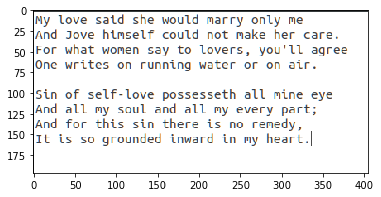

In [4]:
#read the text image using imread

org_img = cv2.imread("Poem.png")
plt.imshow(org_img) #display the read image

### 2. Download the image from the internet

In [5]:
success_img_url = 'https://rukminim1.flixcart.com/image/352/352/k47cgi80/mug/b/h/x/an-attitude-text-written-i-never-dreamed-about-success-i-worked-original-imafn54amf7y2xzz.jpeg?q=70'
img_name = "sucess.jpg"

urllib.request.urlretrieve(success_img_url, img_name)

('sucess.jpg', <http.client.HTTPMessage at 0x7f6468086f28>)

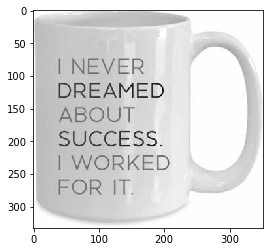

In [6]:
# Check if image is present in the present directory
if os.path.isfile(img_name):
    # read the image
    success_img = cv2.imread(img_name)
    plt.imshow(success_img)

The result of the <code>imread</code> function is in <code>BGR</code> format which is not promising when using <code>Tesseract OCR</code>.
We us two methods to improve its result
<ol>
    <li>Resizing the Image</li>
    <li>Using Gaussian Blur</li>
</ol>    

### For Local Image

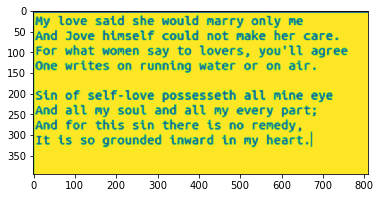

In [7]:
# Image Resize
resize_img = cv2.resize(org_img, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)

# Converting to Gray Scale
filtered_grayscale_img = cv2.cvtColor(resize_img, cv2.COLOR_BGR2GRAY)

# Using Gaussian Blur
gaussian_blur_img = cv2.GaussianBlur(filtered_grayscale_img, (5, 5), 0)

plt.imshow(gaussian_blur_img)

### For Downloaded Image

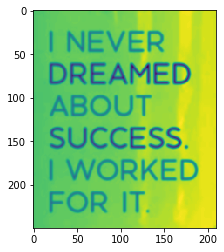

In [8]:
# Crop the Image
croped_success_img = success_img[50: 300, 20: 230]

# Converting to Gray Scale
gray_success_img = cv2.cvtColor(croped_success_img, cv2.COLOR_BGR2GRAY)

# Using Gaussian Blur
gaussian_success_img = cv2.GaussianBlur(gray_success_img, (5, 5), 0)

plt.imshow(gaussian_success_img)

Now the text image is passed through the <code>Tesseract OCR Engine</code>

### For Local Image

In [22]:
text_img = pytesseract.image_to_string(org_img, lang = 'eng', 
                                      config = '--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890')

In [23]:
print(text_img)

My love said she would marry only me

And Jove himself could not make her care.
For what women say to lovers, you'll agree
lone writes on running water or on air.

Sin of self-love possesseth all mine eye
And all my soul and all my every part;

land for this sin there is no remedy,

It is so grounded inward in my heart.


### For Downloaded Image

In [20]:
success_text_img = pytesseract.image_to_string(gaussian_success_img, lang = 'eng', 
                                              config = '--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890')

In [21]:
print(success_text_img)

| NEVER
DREAMED
ABOUT
SUCCESS.
| WORKED
FOR IT


Now the cropped image can be used for OCR

## Passing the string generated to IBM Watson Text to Speech

In [ ]:
# install the ibm watson package
!pip install ibm_watson

In [27]:
# import the packages required
import IPython
from ibm_watson import TextToSpeechV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [28]:
apikey = '' # your apikey
url = '' # Your url endpoint

In [29]:
# instantiate the TextToSpeech with apikey and set the service url
T2S = TextToSpeechV1(IAMAuthenticator(apikey))
T2S.set_service_url(url)

In [30]:
def speak_text(text):
    
    with open('temp.wav', 'wb') as audio_file:
        response = T2S.synthesize(text, accept = 'audio/wav', voice = 'en-US_AllisonV3Voice').get_result()
        audio_file.write(response.content)
        
    return IPython.display.Audio('temp.wav', autoplay = True)

### For Local Image

In [33]:
text_img = text_img.replace("\n", " ")
speak_text(text_img)

### For Downloaded Image

In [34]:
success_text_img = success_text_img.replace("\n", " ")
speak_text(success_text_img)